# Data Science Capstone Project 
##  Analysis of Process Events from the Comprehensive, Multi-Source Cybersecurity Events

## Kimberly Nowell-Berry
###  September 2017

### Purpose
The purpose of this capstone project is analyze and visualize data from the Comprehensive, Multi-Source Cybersecurity Events.  Specifically, this project concentrates on process events. Exploratory data analysis of Windows-based process events that includes visualizations and observations is presented.  In cybersecurity, information about processes can be used to identify anomalous process that may indicate the presence of malware, advanced persistent threats (APTs), unauthorized changes to the system, or more generally, performance information about the processes or computers themselves.  This project tries to identify similar users, i.e., users that run similar processes.

### Data

The data used in this capstone project is a 58 day, de-identified capture of users, computers, and processes on a network.  The data was retrieved from Windows endpoints/computers on the network and although de-identified, maintain the similar information to what can be found in normal Windows Security Event Logs.  This particular data, stop and start times for individual computer systems directly translate to Windows start and stop event IDs: 4688 and 4689.  These represent granular workstation activity and can be used to identify what happens on the workstation after the user has logged in. The data was made available from Los Alamos National Laboratory, and can be retrieved here:
https://csr.lanl.gov/data/cyber1/

A. D. Kent, “Comprehensive, Multi-Source Cybersecurity Events,” Los Alamos National Laboratory, http://dx.doi.org/10.17021/1179829, 2015.

#### Data Format
The data will have the format of: 
"time,user@domain,computer,process name,start/end" and represents a process event at the given time. 

1. time
 Time starts at epoch 1 and increments at 1 second.  
2. user@domain
 This data identifies a unique user.  You might see U1@DOM1 and U1@COMP2.  These are unique users:  the first identifies a user on a domain, and the second identifies a local user account on a computer.  This may translate to the same person, but they are unique accounts, i.e., the person may have 2 accounts.  This cannot be assumed, however, and is treated as unique.  Unique identification of users helps attribution of events.
3.  computer
 This data identifies a unique computer.
4.  process name
 This data identifies unique processes. 
5.  start/end
 This is a categorical feature that identifies whether or not the process in the event was started or stopped.  

### Importing the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Importing Data

In [2]:
columns = ['time', 'username', 'computer', 'process_name', 'start_or_stop']
df = pd.read_csv("C:\\Users\\kim\\data\\proc.txt", nrows=50000)
df.columns=columns

### Feature Analysis

#### Users 
Users are a principal component of this data set.  They are the actor of the event and can be used to attribute specific actions.

In [3]:
print("Total Number of Users: ", df['username'].nunique())
print("Maximum records for a user in the data: ", df['username'].value_counts().max())
print("User that was the most active: ", df['username'].mode()[0]) 

Total Number of Users:  3008
Maximum records for a user in the data:  1637
User that was the most active:  C1685$@DOM1


####  Computers 
Computers indicate where on network the processes were run.  

In [4]:
print("Total Number of Computers: ", df['computer'].nunique())
print("Number of events associated with the computer that was seen most frequently: ", df['computer'].value_counts().max())
print("Computer that was seen most frequently: ", df['computer'].mode()[0])

Total Number of Computers:  2471
Number of events associated with the computer that was seen most frequently:  1637
Computer that was seen most frequently:  C1685


##### Visualization of Computer Frequency

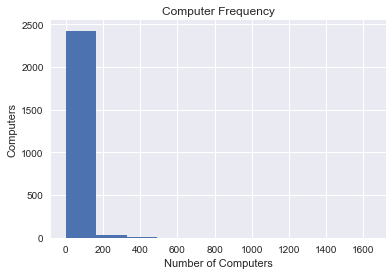

In [5]:
computers_df = df['computer'].value_counts().reset_index() 
columns = ['computer','count']
computers_df.columns=columns
plt.hist(computers_df['count'])
plt.title('Computer Frequency')
plt.ylabel('Computers')
plt.xlabel('Number of Computers')

##### Visualization of Computer Frequency part 2
Because the previous visualization highly skewed, to understand the data better, the data is now represented in logscale.  This representation shows that most computers are seen approximately 150 times or less in the data set.  Representing in logscale removes outliers, and allows for better visualization.

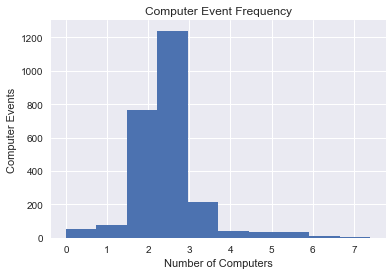

In [6]:
computers_df = df['computer'].value_counts().reset_index() 
columns = ['computer','count']
computers_df.columns=columns
plt.hist(computers_df['count'].apply(np.log))
plt.title('Computer Event Frequency')
plt.ylabel('Computer Events')
plt.xlabel('Number of Computers')

### Processes
Processes represent individual executables, programs, or applications running on a computer.

In [7]:
print("Total Number of Unique Processes: ", df['process_name'].nunique())
print("Process that was seen most frequently: ", df['process_name'].mode()[0])
print("The most frequently seen process was seen this many times: ", df['process_name'].value_counts().max())
# add in the percentage of this process

Total Number of Unique Processes:  311
Process that was seen most frequently:  P16
The most frequently seen process was seen this many times:  10299


The describe method from pandas gives us some interesting information about the data. Most of the computers have less than 32 processes running on them for the given time period. The most unique processes were only seen once during the time period. 

In [8]:
process_df = df['process_name'].value_counts()
process_df.describe([])

count      311.000000
mean       160.771704
std        763.610838
min          1.000000
50%          6.000000
max      10299.000000
Name: process_name, dtype: float64

##### Visualization of Process Frequency 

(array([ 296.,   12.,    1.,    0.,    0.,    0.,    1.,    0.,    0.,    1.]),
 array([  1.00000000e+00,   1.03080000e+03,   2.06060000e+03,
          3.09040000e+03,   4.12020000e+03,   5.15000000e+03,
          6.17980000e+03,   7.20960000e+03,   8.23940000e+03,
          9.26920000e+03,   1.02990000e+04]),
 <a list of 10 Patch objects>)

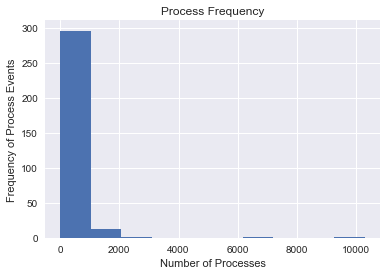

In [9]:
process_df = df['process_name'].value_counts().reset_index() 
columns = ['process_name','count']
process_df.columns=columns
plt.title('Process Frequency')
plt.ylabel('Frequency of Process Events')
plt.xlabel('Number of Processes')
plt.hist(process_df['count'])

##### Visualization of Process Frequency part 2
Again, you can see that the data is highly skewed.  Again, using the logscale helps to visualize this data in a better fashion, removing outliers.

(array([ 93.,  68.,  43.,  37.,  21.,  21.,   7.,  16.,   3.,   2.]),
 array([ 0.        ,  0.92398021,  1.84796042,  2.77194062,  3.69592083,
         4.61990104,  5.54388125,  6.46786146,  7.39184167,  8.31582187,
         9.23980208]),
 <a list of 10 Patch objects>)

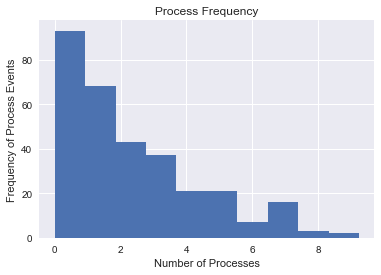

In [10]:
process_df = df['process_name'].value_counts().reset_index() 
columns = ['process_name','count']
process_df.columns=columns
plt.title('Process Frequency')
plt.ylabel('Frequency of Process Events')
plt.xlabel('Number of Processes')
plt.hist(process_df['count'].apply(np.log))

#### Time
Time is represented in seconds starting from 1 used to de-identify the data.

In [11]:
print("Latest Time seen in data: ", df['time'].max())
print("Earlieset Time seen in data: ", df['time'].min())

Latest Time seen in data:  1384
Earlieset Time seen in data:  1


#### Start/Stop Events
This data represents whether or not the process was started or whether the process was stopped.

In [12]:
print("Total number of start and stop events: ")
df['start_or_stop'].value_counts()

Total number of start and stop events: 


Start    35630
End      14370
Name: start_or_stop, dtype: int64

#### Data Analysis
The following computes the average number of computers per user.  Because users can log in and use multiple computers, it is useful to identify what the average number of computers per user is in this data set.

In [13]:
avg_u = df.groupby(['username'])['computer'].nunique()
print("Average number of computers per user: ")
avg_u_mean = avg_u.mean()
print(avg_u_mean)

Average number of computers per user: 
1.016622340425532


The following computes the maximum number of computers used by a user.  This is useful to identify, particularly in cyber security as if the maximum number of computers used by a user is closer to the total number of computers in the envirtonment, this could possibly indicate a brute force attack.

In [14]:
print("Maximum number of computers used by a user")
avg_u_max = avg_u.max()
print(avg_u_max)

Maximum number of computers used by a user
9


I'm still working from here down............................................................................'

In [15]:
avg_p = df.groupby(['username','computer'])['process_name'].value_counts()
avg_p

username     computer  process_name
C1$@DOM1     C1        P16              9
C10$@DOM1    C10       P47              4
                       P9               4
                       P25              2
C100$@DOM1   C100      P16              5
                       P13              2
                       P14              2
                       P1               1
                       P10              1
                       P25              1
                       P3               1
                       P4               1
                       P5               1
                       P8               1
                       P96              1
C1000$@DOM1  C1000     P16              4
                       P1               1
                       P10              1
                       P3               1
                       P4               1
C1001$@DOM1  C1001     P16              5
                       P1               1
                       P10              

In [16]:
df_grouped = df.groupby(['username','computer','process_name'])['username'].count().to_frame()
df_grouped.columns = ['process_counts']
df_grouped
df_grouped2 = df_grouped.reset_index()
df_grouped2.head()

,username,computer,process_name,process_counts
0,C1$@DOM1,C1,P16,9
1,C10$@DOM1,C10,P25,2
2,C10$@DOM1,C10,P47,4
3,C10$@DOM1,C10,P9,4
4,C100$@DOM1,C100,P1,1


In [17]:
#sns.boxplot(x = 'username', y = 'process_counts', hue='process_name', data=df_grouped2)

In [18]:
df_byuser = df_grouped2.set_index(['username'])
df_byuser

,computer,process_name,process_counts
username,,,
C1$@DOM1,C1,P16,9
C10$@DOM1,C10,P25,2
C10$@DOM1,C10,P47,4
C10$@DOM1,C10,P9,4
C100$@DOM1,C100,P1,1
C100$@DOM1,C100,P10,1
C100$@DOM1,C100,P13,2
C100$@DOM1,C100,P14,2
C100$@DOM1,C100,P16,5


In [19]:
df_byuser.groupby(level=0)['process_counts'].sum().sort_values()


username
LOCAL SERVICE@C394          1
LOCAL SERVICE@C3495         1
C2377$@DOM1                 1
LOCAL SERVICE@C162          1
U354@DOM1                   1
U165@DOM1                   1
LOCAL SERVICE@C1590         1
NETWORK SERVICE@C3241       1
LOCAL SERVICE@C1577         1
NETWORK SERVICE@C3147       1
LOCAL SERVICE@C3532         1
NETWORK SERVICE@C3116       1
NETWORK SERVICE@C1261       1
U173@DOM1                   1
U504@DOM1                   1
NETWORK SERVICE@C3149       1
C3900$@DOM1                 1
NETWORK SERVICE@C3276       1
LOCAL SERVICE@C1641         1
NETWORK SERVICE@C3602       1
NETWORK SERVICE@C3570       1
NETWORK SERVICE@C3547       1
C1816$@DOM1                 1
LOCAL SERVICE@C3333         1
LOCAL SERVICE@C722          1
NETWORK SERVICE@C1153       1
LOCAL SERVICE@C717          1
U151@DOM1                   1
LOCAL SERVICE@C999          1
NETWORK SERVICE@C3386       1
                         ... 
C1723$@DOM1               192
LOCAL SERVICE@C1567       192
L

In [20]:
df_byuser.loc['C1183$@DOM1']

,computer,process_name,process_counts
username,,,
C1183$@DOM1,C1183,P133,2
C1183$@DOM1,C1183,P144,2
C1183$@DOM1,C1183,P16,10
C1183$@DOM1,C1183,P25,2
C1183$@DOM1,C1183,P271,2
C1183$@DOM1,C1183,P272,2
C1183$@DOM1,C1183,P5,4
C1183$@DOM1,C1183,P8,2


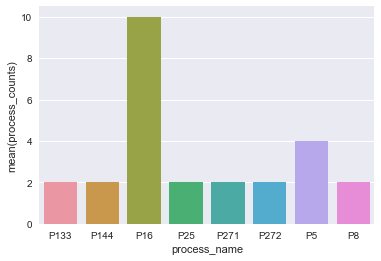

In [21]:
sns.barplot(x='process_name', y='process_counts', data = df_byuser.loc['C1183$@DOM1'])

To see the most used computer, or the computer where the most processes were run, we get the maximum.

Let's plot this.

In [22]:
cdf= df.groupby('username')['computer'].value_counts()
cdf


username     computer
C1$@DOM1     C1            9
C10$@DOM1    C10          10
C100$@DOM1   C100         17
C1000$@DOM1  C1000         8
C1001$@DOM1  C1001        11
C1002$@DOM1  C1002         8
C1003$@DOM1  C1003         5
C1004$@DOM1  C1004         8
C1005$@DOM1  C1005        10
C1006$@DOM1  C1006        94
C1007$@DOM1  C1007         8
C1008$@DOM1  C1008         9
C1009$@DOM1  C1009        12
C101$@DOM1   C101        260
C1010$@DOM1  C1010        28
C1011$@DOM1  C1011        11
C1012$@DOM1  C1012        14
C1013$@DOM1  C1013        13
C1014$@DOM1  C1014        11
C1016$@DOM1  C1016        11
C1017$@DOM1  C1017        12
C1018$@DOM1  C1018        10
C1019$@DOM1  C1019        20
C1020$@DOM1  C1020        12
C1021$@DOM1  C1021        18
C1022$@DOM1  C1022        17
C1023$@DOM1  C1023        17
C1024$@DOM1  C1024         9
C1026$@DOM1  C1026         8
C1027$@DOM1  C1027        11
                        ... 
U6@DOM1      C606          5
             C449          3
U726@DOM1    C1712   

In [23]:
#df['z_score'] = df.groupby('computer')['process_name'].apply(lambda x: (x - x.mean())/x.std())

In [24]:
num_com = df.groupby('username')['computer'].count()
num_com

username
C1$@DOM1         9
C10$@DOM1       10
C100$@DOM1      17
C1000$@DOM1      8
C1001$@DOM1     11
C1002$@DOM1      8
C1003$@DOM1      5
C1004$@DOM1      8
C1005$@DOM1     10
C1006$@DOM1     94
C1007$@DOM1      8
C1008$@DOM1      9
C1009$@DOM1     12
C101$@DOM1     260
C1010$@DOM1     28
C1011$@DOM1     11
C1012$@DOM1     14
C1013$@DOM1     13
C1014$@DOM1     11
C1016$@DOM1     11
C1017$@DOM1     12
C1018$@DOM1     10
C1019$@DOM1     20
C1020$@DOM1     12
C1021$@DOM1     18
C1022$@DOM1     17
C1023$@DOM1     17
C1024$@DOM1      9
C1026$@DOM1      8
C1027$@DOM1     11
              ... 
U67@C1723      230
U67@C1933      168
U67@C35         92
U67@C822        69
U691@DOM1        1
U6@DOM1         47
U726@DOM1        1
U727@DOM1        1
U736@DOM1        1
U737@DOM1        2
U73@DOM1         6
U744@DOM1        1
U755@DOM1        1
U769@DOM1        1
U77@DOM1         4
U78@DOM1        47
U79@C1731      116
U80@DOM1        10
U81@C2547        3
U82@DOM1        22
U83@C1747      170
U84

To find the most active user, we get the total of all of the users.

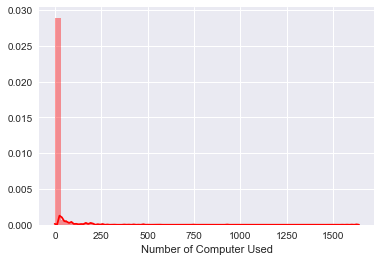

In [25]:
sns.distplot(num_com, color='r', axlabel='Number of Computer Used')

In [26]:
df['computer'].count()

50000

In [27]:
df['username'].count()

50000

In [28]:
df['process_name'].nunique()

311

In [29]:
df[df['username']=='C1183$@DOM1']

,time,username,computer,process_name,start_or_stop
620,2,C1183$@DOM1,C1183,P144,Start
621,2,C1183$@DOM1,C1183,P271,End
622,2,C1183$@DOM1,C1183,P271,Start
623,2,C1183$@DOM1,C1183,P272,End
624,2,C1183$@DOM1,C1183,P272,Start
625,2,C1183$@DOM1,C1183,P5,Start
626,2,C1183$@DOM1,C1183,P8,Start
5902,40,C1183$@DOM1,C1183,P133,Start
6510,58,C1183$@DOM1,C1183,P133,End
8003,94,C1183$@DOM1,C1183,P144,End
